CAPSTONE PROJECT BY MOHAMAD NASRULLAH MOHD YASIN

LAST UPDATE: 24/7/2025

DATASET ABOUT INSURANCE POLICY ACROSS THE WORLD

SCOPING:-
BIG QUESTION:What demographic, lifestyle, and policy-related factors influence insurance policy purchases, premium amounts, and claim behaviors across different client segments?





**Introduction & Libraries**


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load and Inspect Data**


In [105]:
policy_df = pd.read_csv(r"C:\Users\encik\Downloads\Capstone Project\policy info.csv")
client_df = pd.read_csv(r"C:\Users\encik\Downloads\Capstone Project\client info.csv")

print(policy_df.head())
print(client_df.head())

   Client_ID policy_id policy_type start_date    end_date annual_premium  \
0          1   P0001-1        life  1/15/2020  2021.01.14           1500   
1          1   P0001-2      vision  15-Jan-20  2021.01.14           1500   
2          1   P0001-3        life  1/15/2020   1/14/2021           1500   
3          2   P0002-1      dental  15-Jan-20   1/14/2021          2,000   
4          2   P0002-2        life  15-Jan-20   14-Jan-21           1800   

   claim_amount  number_of_claims  
0         800.0               3.0  
1        1200.0               3.0  
2         800.0               1.0  
3         800.0               0.0  
4           NaN               0.0  
   Client_ID   age       sex     bmi  children smoker      region
0          1  19.0  female    27.900         0    yes  south west
1          2  18.0    male    33.770         1     no  south east
2          3  28.0    male    33.000         3     no  south east
3          4  33.0    male    22.705         0     no   Northwe

In [106]:
# Check basic info
print("Policy Info:")
print(policy_df.info())
print(policy_df.isnull().sum())

print("\nClient Info:")
print(client_df.info())
print(client_df.isnull().sum())


policy_df.shape
client_df.shape

Policy Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Client_ID         2689 non-null   int64  
 1   policy_id         2689 non-null   object 
 2   policy_type       2683 non-null   object 
 3   start_date        2689 non-null   object 
 4   end_date          2689 non-null   object 
 5   annual_premium    2150 non-null   object 
 6   claim_amount      2182 non-null   float64
 7   number_of_claims  2137 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 168.2+ KB
None
Client_ID             0
policy_id             0
policy_type           6
start_date            0
end_date              0
annual_premium      539
claim_amount        507
number_of_claims    552
dtype: int64

Client Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1405 entries, 0 to 1404
Data columns (total 7 columns):
 #   Column     N

(1405, 7)

In [107]:
#CLEANING POLICY TABLE
#Remove duplicates
policy_df.drop_duplicates(subset=['policy_id'], inplace=True)

# Convert numeric columns
policy_df['annual_premium'] = pd.to_numeric(policy_df['annual_premium'], errors='coerce')
policy_df['claim_amount'] = pd.to_numeric(policy_df['claim_amount'], errors='coerce')
policy_df['number_of_claims'] = pd.to_numeric(policy_df['number_of_claims'], errors='coerce')

# Standardize dates
policy_df['start_date'] = policy_df['start_date'].str.replace(r"[/ .]", "-", regex = True)
policy_df['start_date'] = pd.to_datetime(policy_df['start_date'], format = 'mixed')
policy_df['start_date'] = policy_df['start_date'].dt.strftime("%d-%m-%Y")

policy_df['end_date'] = policy_df['end_date'].str.replace(r"[/ .]", "-", regex = True)
policy_df['end_date'] = pd.to_datetime(policy_df['end_date'], format = 'mixed')
policy_df['end_date'] = policy_df['end_date'].dt.strftime("%d-%m-%Y")


#impute missing value
policy_df.fillna({'claim_amount': 0, 'number_of_claims': 0}, inplace = True)
print(policy_df['annual_premium'].unique())



import random

# Get all policy types in the dataset (ignoring NaN)
all_policy_types = policy_df['policy_type'].dropna().unique().tolist()

# Function to fill missing policy types for each client
def fill_policy_types(group):
    
    existing = group['policy_type'].dropna().tolist()
    available = [ptype for ptype in all_policy_types if ptype not in existing]
    
    # Fill missing values
    for idx in group[group['policy_type'].isna()].index:
        if available:
            chosen = available.pop(0)  # Take the first available type
        else:
            chosen = 'unknown'  # If no unique types left
        group.at[idx, 'policy_type'] = chosen
    return group

# Apply function to each client
policy_df = policy_df.groupby('Client_ID', group_keys=False).apply(fill_policy_types).reset_index()



policy_df.info()
policy_df.isna().sum()
policy_df.head(20)

[1500.   nan 1800.]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             2689 non-null   int64  
 1   Client_ID         2689 non-null   int64  
 2   policy_id         2689 non-null   object 
 3   policy_type       2689 non-null   object 
 4   start_date        2689 non-null   object 
 5   end_date          2689 non-null   object 
 6   annual_premium    1074 non-null   float64
 7   claim_amount      2689 non-null   float64
 8   number_of_claims  2689 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 189.2+ KB


C:\Users\encik\AppData\Local\Temp\ipykernel_18244\2590768507.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  policy_df = policy_df.groupby('Client_ID', group_keys=False).apply(fill_policy_types).reset_index()


,index,Client_ID,policy_id,policy_type,start_date,end_date,annual_premium,claim_amount,number_of_claims
0,0,1,P0001-1,life,15-01-2020,14-01-2021,1500.0,800.0,3.0
1,1,1,P0001-2,vision,15-01-2020,14-01-2021,1500.0,1200.0,3.0
2,2,1,P0001-3,life,15-01-2020,14-01-2021,1500.0,800.0,1.0
3,3,2,P0002-1,dental,15-01-2020,14-01-2021,NaN,800.0,0.0
4,4,2,P0002-2,life,15-01-2020,14-01-2021,1800.0,0.0,0.0
5,5,3,P0003-1,vision,15-01-2020,14-01-2021,NaN,0.0,0.0
6,6,4,P0004-1,dental,15-01-2020,14-01-2021,1500.0,0.0,0.0
7,7,4,P0004-2,life,15-01-2020,14-01-2021,1800.0,1200.0,3.0
8,8,4,P0004-3,health,15-01-2020,14-01-2021,NaN,0.0,0.0
9,9,5,P0005-1,dental,15-01-2020,14-01-2021,NaN,800.0,1.0


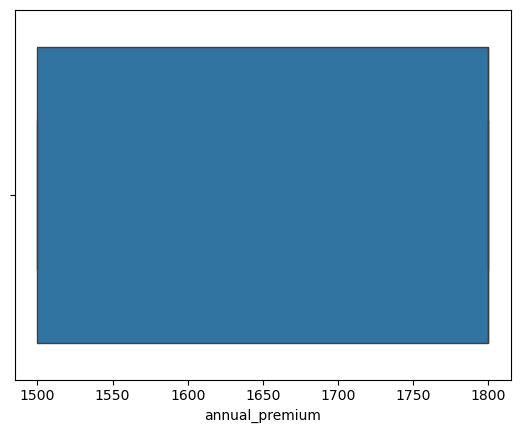

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2689 entries, 0 to 2688
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             2689 non-null   int64  
 1   Client_ID         2689 non-null   int64  
 2   policy_id         2689 non-null   object 
 3   policy_type       2689 non-null   object 
 4   start_date        2689 non-null   object 
 5   end_date          2689 non-null   object 
 6   annual_premium    2689 non-null   float64
 7   claim_amount      2689 non-null   float64
 8   number_of_claims  2689 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 189.2+ KB


In [108]:
#checking for outliers for annual premium
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=policy_df['annual_premium'])
plt.show()


#impute with mean
policy_df['annual_premium'] = policy_df['annual_premium'].copy()
policy_df['annual_premium'] = policy_df['annual_premium'].fillna(policy_df['annual_premium'].mean())

policy_df.isnull().sum()
policy_df.info()

**CLEANING CLIENT TABLE**

In [86]:
client_df.drop_duplicates(subset=['Client_ID'], inplace=True)
client_df[['age', 'bmi','smoker']].isnull().sum()

age       132
bmi       133
smoker    134
dtype: int64

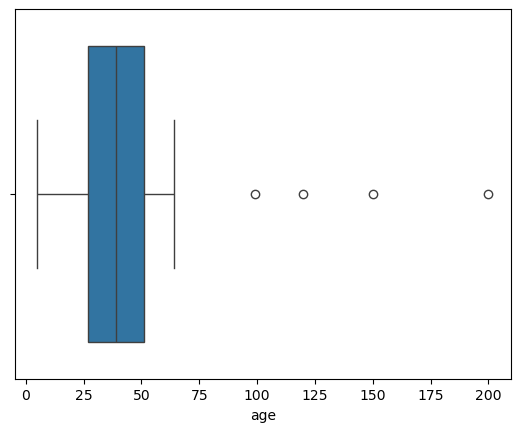

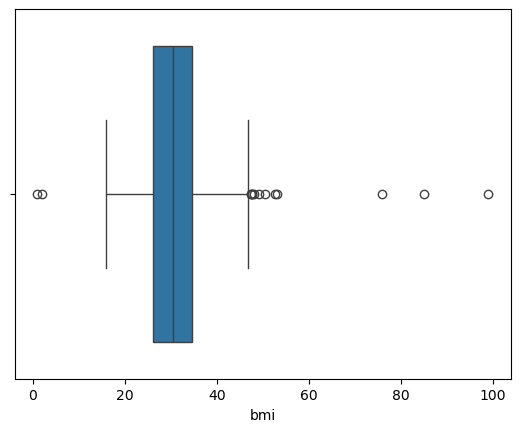

,Client_ID,age,sex,bmi,children,smoker,region
0,1,19.0,female,27.900,0,yes,south west
1,2,18.0,male,33.770,1,no,south east
2,3,28.0,male,33.000,3,no,south east
3,4,33.0,male,22.705,0,no,Northwest
4,5,39.0,MALE,39.000,0,no,Northwest
5,6,31.0,female,25.740,0,no,south east
6,7,46.0,female,33.440,1,no,south east
7,8,37.0,female,27.740,3,no,Northwest
8,9,37.0,male,29.830,2,no,north east
9,10,60.0,female,25.840,0,no,Northwest


In [109]:
#checking for outliers for age and bmi

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=client_df['age'])
plt.show()
sns.boxplot(x=client_df['bmi'])
plt.show()

#impute age and bmi with median

client_df['age'] = client_df['age'].copy()
client_df['age'] = client_df['age'].fillna(client_df['age'].median())


client_df['bmi'] = client_df['bmi'].copy()
client_df['bmi'] = client_df['bmi'].fillna(client_df['age'].median())



#impute smoker use mode
client_df['smoker'] = client_df['smoker'].fillna(client_df['smoker'].mode()[0])

client_df.isnull().sum()

client_df.head(10)

**MERGE DATA**

In [110]:
merge = pd.merge(policy_df, client_df, on = 'Client_ID', how = 'left')

merge.head()



#convert data types

merge['start_date'] = pd.to_datetime(merge['start_date'], format = 'mixed')
merge['end_date'] = pd.to_datetime(merge['end_date'],format = 'mixed')


merge['sex'] = merge['sex'].str.title().str.strip()
merge['policy_type'] = merge['policy_type'].str.title().str.strip()
merge['region'] = merge['region'].str.title().str.strip()

# Create age groups
bins = [18, 30, 40, 50, 60, 80]
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
merge['age_group'] = pd.cut(merge['age'], bins=bins, labels=labels, right=False)

#convert data types
merge['age_group'] = merge['age_group'].astype('object')

merge['number_of_claims	'] = merge['number_of_claims'].round(0).astype(int)


merge = merge.dropna(subset=['age_group'])
merge.isna().sum()
merge.shape
merge

,index,Client_ID,policy_id,policy_type,start_date,end_date,annual_premium,claim_amount,number_of_claims,age,sex,bmi,children,smoker,region,age_group,number_of_claims\t
0,0,1,P0001-1,Life,2020-01-15,2021-01-14,1500.000000,800.0,3.0,19.0,Female,27.90,0,yes,South West,18-29,3
1,1,1,P0001-2,Vision,2020-01-15,2021-01-14,1500.000000,1200.0,3.0,19.0,Female,27.90,0,yes,South West,18-29,3
2,2,1,P0001-3,Life,2020-01-15,2021-01-14,1500.000000,800.0,1.0,19.0,Female,27.90,0,yes,South West,18-29,1
3,3,2,P0002-1,Dental,2020-01-15,2021-01-14,1656.703911,800.0,0.0,18.0,Male,33.77,1,no,South East,18-29,0
4,4,2,P0002-2,Life,2020-01-15,2021-01-14,1800.000000,0.0,0.0,18.0,Male,33.77,1,no,South East,18-29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,2684,1337,P1337-1,Vision,2020-01-15,2021-01-14,1656.703911,0.0,2.0,21.0,Female,25.80,0,no,South West,18-29,2
2812,2685,1337,P1337-2,Vision,2020-01-15,2021-01-14,1656.703911,500.0,1.0,21.0,Female,25.80,0,no,South West,18-29,1
2813,2686,1337,P1337-3,Life,2020-01-15,2021-01-14,1500.000000,1200.0,0.0,21.0,Female,25.80,0,no,South West,18-29,0
2814,2687,1338,P1338-1,Life,2020-01-15,2021-01-14,1656.703911,500.0,1.0,61.0,Female,29.07,0,yes,Northwest,60+,1


**Exploratory Data Analysis (EDA)**



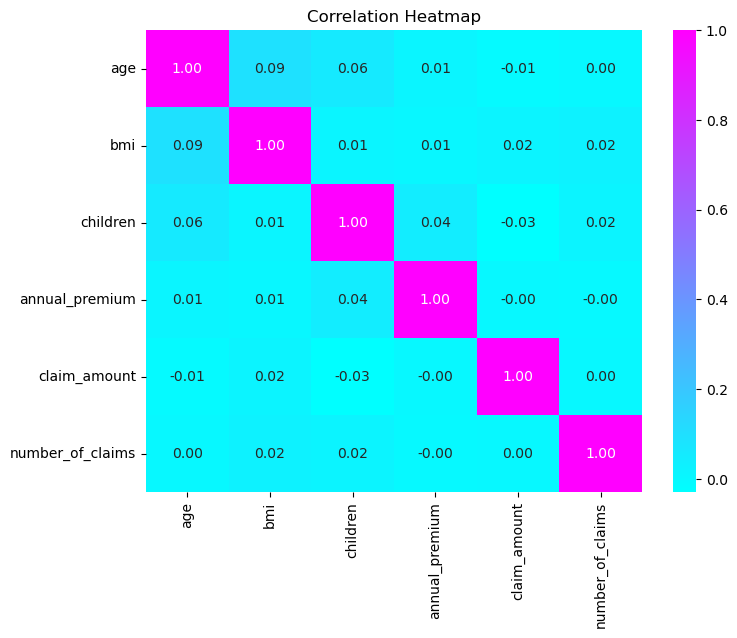

In [111]:
#correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['age', 'bmi', 'children', 'annual_premium', 'claim_amount', 'number_of_claims']
corr = merge[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='cool', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


From correlation heatmap, it shows none of of column hihgly correlate with another columns.

mean the data weakly related to each other, data is synthetic, categorical is important predictor.

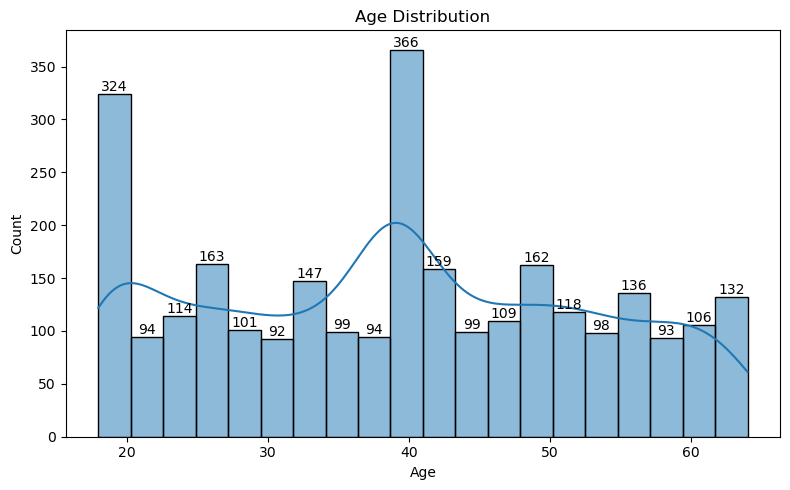

In [112]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(merge['age'], bins=20, kde=True)

# Add labels on each bar
for p in ax.patches: 
    height = p.get_height()
    if height > 0: 
        ax.text(p.get_x() + p.get_width() / 2, height,  
                int(height), ha='center', va='bottom', fontsize=10)

plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**IMPORTANT VISUAL**

**POLICY TYPE PREFERENCE BY GENDER**

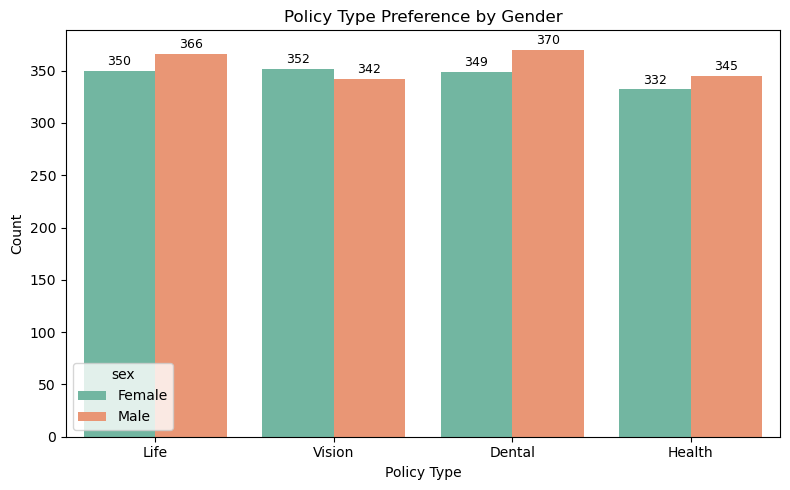

In [113]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x='policy_type', hue='sex', data=merge, palette='Set2')


for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.title("Policy Type Preference by Gender")
plt.xlabel("Policy Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


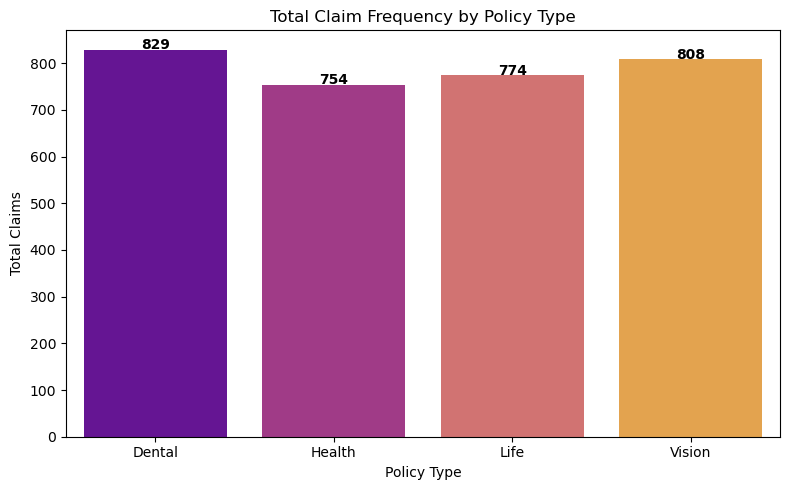

In [102]:
# Calculate claim frequency per policy type
claim_freq = merge.groupby('policy_type')['number_of_claims'].sum().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(x='policy_type', y='number_of_claims', hue = 'policy_type', data=claim_freq, palette='plasma')

# Add value labels on bars
for i, v in enumerate(claim_freq['number_of_claims']):
    ax.text(i, v + 1, str(int(v)), ha='center', fontweight='bold')

plt.title("Total Claim Frequency by Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Total Claims")
plt.tight_layout()
plt.show()


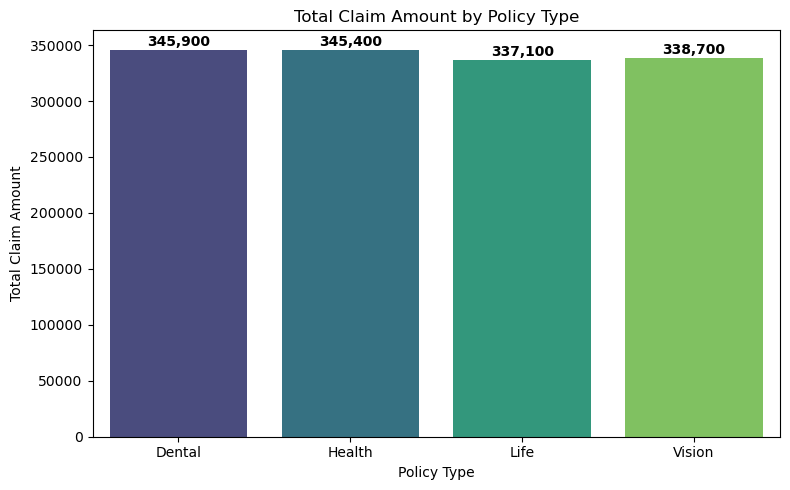

In [103]:
# Aggregate total claim amount by policy type
claim_amount = merge.groupby('policy_type')['claim_amount'].sum().reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(x='policy_type', y='claim_amount',hue = 'policy_type', data=claim_amount, palette='viridis')

# Add value labels on top of bars
for i, v in enumerate(claim_amount['claim_amount']):
    ax.text(i, v + (v * 0.01), f'{v:,.0f}', ha='center', fontweight='bold')

plt.title("Total Claim Amount by Policy Type")
plt.xlabel("Policy Type")
plt.ylabel("Total Claim Amount")
plt.tight_layout()
plt.show()


**IMPORTANT**

**TOP 10 POLICY TYPE COMBINATIONS**

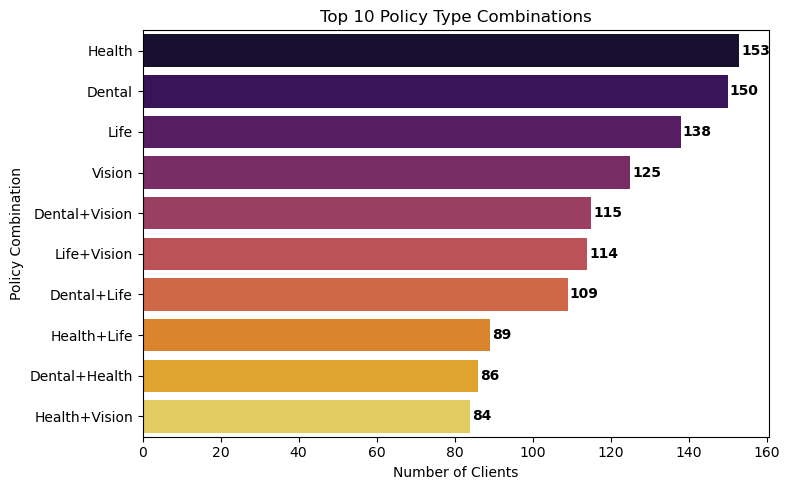


Top Policy Combinations:
 policy_type
Health           153
Dental           150
Life             138
Vision           125
Dental+Vision    115
Life+Vision      114
Dental+Life      109
Health+Life       89
Dental+Health     86
Health+Vision     84
Name: count, dtype: int64


In [94]:
combo_counts = (
    merge.groupby('Client_ID')['policy_type']
    .apply(lambda x: "+".join(sorted(set(x))))
    .value_counts()
)

# Plot top 10 combinations
top_combos = combo_counts.head(10)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=top_combos.values, y=top_combos.index, 
                 hue=top_combos.index, palette='inferno', legend=False)

# Add value labels to bars
for i, v in enumerate(top_combos.values):
    ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')

plt.title("Top 10 Policy Type Combinations")
plt.xlabel("Number of Clients")
plt.ylabel("Policy Combination")
plt.tight_layout()
plt.show()

print("\nTop Policy Combinations:\n", top_combos)


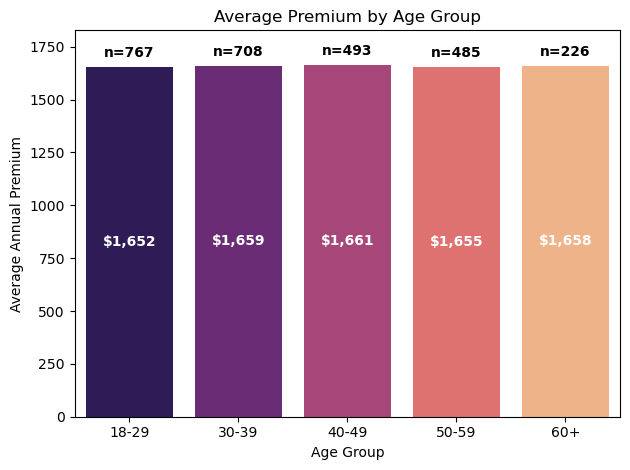

In [95]:
# Average Premium by Age Group
# Calculate mean premium by age group with observed=True
premium_by_age = merge.groupby('age_group')['annual_premium'].mean().reset_index()

# Calculate count for each age group
count_by_age = merge.groupby('age_group').size().reset_index(name='count')

# Merge the mean and count dataframes
premium_by_age = premium_by_age.merge(count_by_age, on='age_group')

# Create the barplot with proper palette usage
ax = sns.barplot(data=premium_by_age, x='age_group', y='annual_premium', hue='age_group', palette='magma', legend=False)

# Add annotations on top of each bar showing both count and premium value
for i, row in enumerate(premium_by_age.itertuples()):
    # Format the premium value with commas for thousands and no decimal places
    premium_formatted = f"${row.annual_premium:,.0f}"
    
    # Add count annotation
    ax.text(i, row.annual_premium + premium_by_age['annual_premium'].max() * 0.02,
            f'n={row.count}',
            ha='center',
            va='bottom',
            fontweight='bold')
    
    # Add average annual premium in the middle of the bar
    ax.text(i, row.annual_premium / 2,  # Position in the middle of the bar
            premium_formatted,
            ha='center',
            va='center',
            fontweight='bold',
            color='white')  


plt.ylim(0, premium_by_age['annual_premium'].max() * 1.1)


plt.xlabel('Age Group')
plt.ylabel('Average Annual Premium')
plt.title('Average Premium by Age Group')

plt.tight_layout()

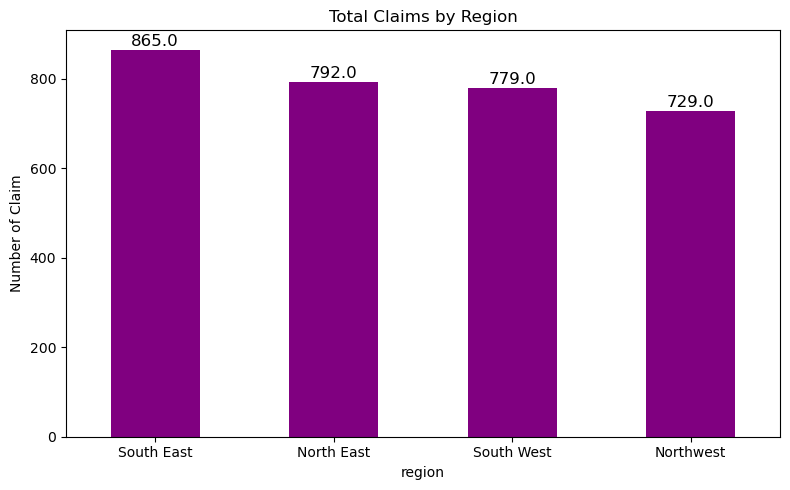

In [96]:
#Total claims by region
claim_freq = merge.groupby('region')['number_of_claims'].sum().sort_values(ascending=False)
total_claim= claim_freq.plot(kind='bar', title='Total Claims by Region', figsize=(8, 5), color = 'purple')

for i, value in enumerate(claim_freq):
    total_claim.text(i, value + 0.01 * max(claim_freq), str(value), ha = 'center', fontsize = '12')

plt.xticks(rotation=0)
plt.ylabel('Number of Claim')
plt.tight_layout()
plt.show()

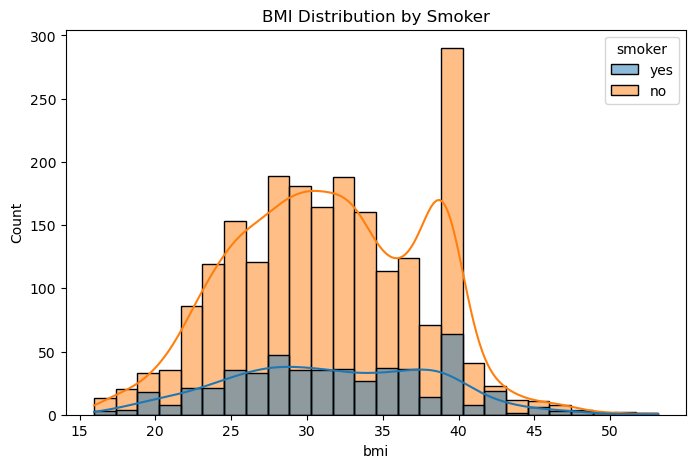

In [97]:
#Histogram with hue: BMI by Smoker
plt.figure(figsize=(8,5))
sns.histplot(data=merge, x='bmi', hue='smoker', kde=True)
plt.title("BMI Distribution by Smoker")
plt.show()

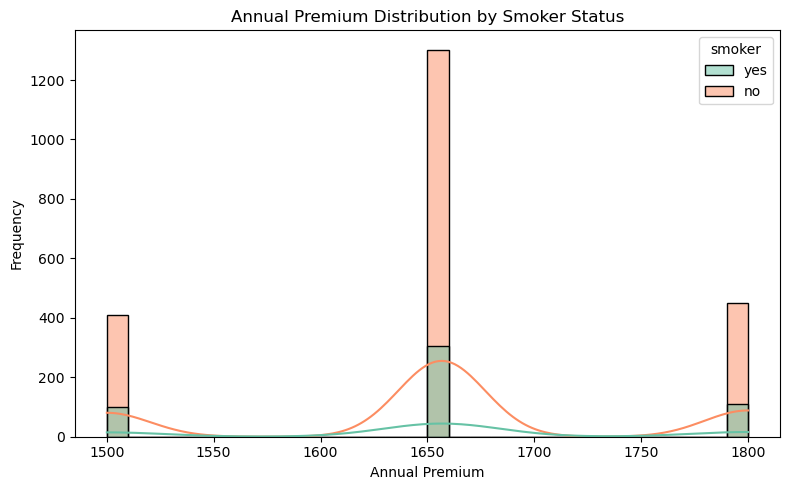

In [98]:
#Annual Premium Distribution by Smoker Status
plt.figure(figsize=(8,5))
sns.histplot(data=merge, x='annual_premium', hue='smoker', bins=30, palette='Set2', kde=True)

    
plt.title("Annual Premium Distribution by Smoker Status")
plt.xlabel("Annual Premium")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


**Conclusions & Recommendations**

In [65]:
merge.to_csv('Merge_table.csv', index = False)

✅ Key Insights from this Data:
Average Premium by Age Group

✅Premiums are quite consistent across age groups, ranging around $1,640–$1,670.

✅The 40–49 age group pays slightly higher premiums on average.

✅Total Claim Amount by Policy Type

✅Dental policies have the highest total claim amount (~$345,900), slightly above health and vision.

✅All policy types contribute almost equally to claims, with health leading.

✅Smokers have a slightly higher average claim amount ($629) than non-smokers ($627), but the difference is minimal in this dataset.

✅Additional Observations:
Most Common Policy: health

✅Policy Type with Highest Avg Claim: health
